In [17]:
import numpy as np
interval = np.linspace(0,np.pi/2,11)
print(pis)

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


0 0.2618560791015625
1 0.129150390625
2 0.050889015197753906
3 0.018161773681640625
4 0.0067291259765625
5 0.0024805068969726562
6 0.000461578369140625
7 0.000244140625
8 0.000244140625
9 0.0005044937133789062
9 0.0005044937133789062
0 0.34332275390625
1 0.17388248443603516
2 0.0629892349243164
3 0.025028228759765625
4 0.005802154541015625
5 0.0007476806640625
6 0.0001373291015625
7 4.673004150390625e-05
8 6.103515625e-05
9 9.5367431640625e-05
9 9.5367431640625e-05
0 0.9555826187133789
1 0.8107032775878906
2 0.5951881408691406
3 0.37491703033447266
4 0.19397830963134766
5 0.059604644775390625
6 0.0186920166015625
7 0.0044097900390625
8 0.0010385513305664062
9 0.0033197402954101562
9 0.0033197402954101562
0 0.3955230712890625
1 0.205322265625
2 0.11682510375976562
3 0.058182716369628906
4 0.017380714416503906
5 0.006569862365722656
6 0.001102447509765625
7 0.000186920166015625
8 3.814697265625e-06
9 7.724761962890625e-05
9 7.724761962890625e-05
0 0.2916421890258789
1 0.1650390625
2 0.11

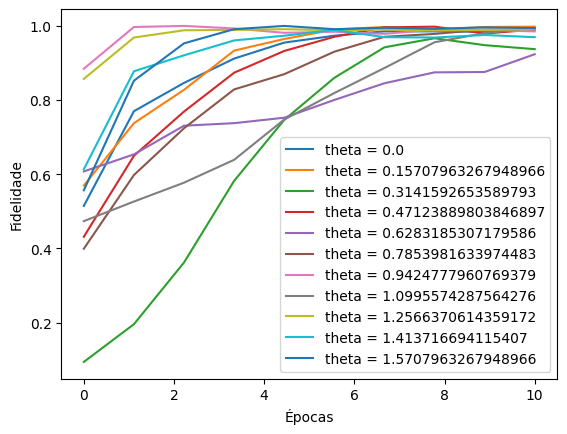

In [19]:
from src.tools import *
#pis = np.linspace(0,np.pi/2,np.pi/2)
for val in interval:
    n_qubits = 1
    circuit, params = vqa_gen_state(n_qubits)
    target_vector, target_op = init_state_gen_state(val,0)
    best_params, f = train(10, circuit, params, target_op)
    x = np.linspace(0,len(f),len(f))
    id = f'theta = {val}'
    plt.plot(x,f,label=id)
plt.ylabel('Fidelidade')
plt.xlabel('Épocas')
plt.legend()
plt.show()

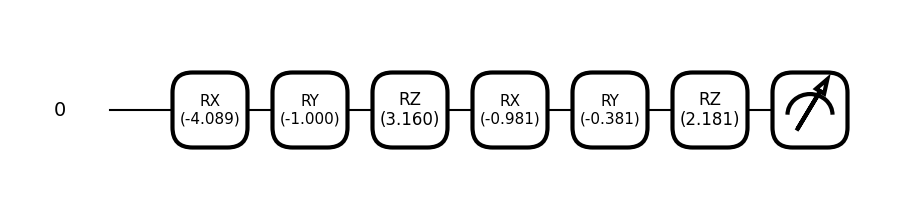

In [1]:
''' CHECK THE SET UP PRINTING THIS CIRCUIT'''
from src.tools import *
def vqa_gen_state(n_qubits, depht=None):
    #n_qubits = 1
    if depht == None:
        depht = n_qubits+1
    n = 3*n_qubits*(1+depht)
    params = random_params(n)
    device = qml.device('qiskit.aer', wires=n_qubits, backend='qasm_simulator')
    @qml.qnode(device, interface="torch")
    def circuit(params, M=None):
        #print(j)
        aux = 0
        for deep in range(0,depht):

            qml.RX(params[0+aux], wires=0)
            qml.RY(params[1+aux], wires=0)
            qml.RZ(params[2+aux], wires=0)
            aux += 3
        return qml.expval(qml.Hermitian(M, wires=0))
    return circuit, params
n_qubits = 1
circuit, params = vqa_gen_state(n_qubits)
target_vector, target_op = init_state_gen_state(np.pi/2,0)
#best_params, f = train(10, circuit, params, target_op)
fig, ax = qml.draw_mpl(circuit, decimals=3)(params, target_op)
plt.show()

In [2]:
def train(epocas, circuit, params, target_op):
    opt = torch.optim.Adam([params], lr=0.1)
    best_loss = 1*cost(circuit, params, target_op)
    best_params = 1*params
    f=[]
    for epoch in range(epocas):
        opt.zero_grad()
        loss = cost(circuit, params, target_op)
        print(epoch, loss.item())
        loss.backward()
        opt.step()
        if loss < best_loss:
            best_loss = 1*loss
            best_params = 1*params
        f.append(fidelidade(circuit, best_params, target_op))
    print(epoch, loss.item())
    return best_params, f


In [ ]:
best_params, f = train(10, circuit, params, target_op)
